# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

In [2]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [4]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

## Electromechanical models

Electrical machines have an electrical component and a mechanical component.

## **Example**: Field-controlled DC motor

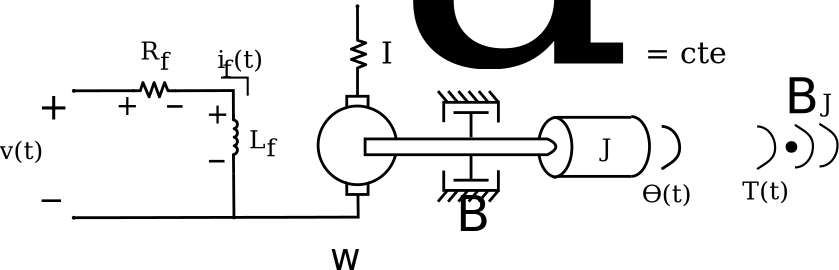

In [5]:
from IPython.display import SVG
SVG(valid_path + 'model_fig30.svg')

**Solution**:

- Electric circuit:

$$\Longrightarrow\quad v\left(t\right)=R_{f}i_{f}\left(t\right)+L_{f}\frac{di_{f}\left(t\right)}{dt}$$

- Electromagnetic conversion:

$$\Longrightarrow\quad T\left(t\right)=Ki_{f}\left(t\right)$$

- Rotational mechanical system:

$$\Longrightarrow\quad T\left(t\right)=\beta\frac{d\theta\left(t\right)}{dt}+J\frac{d^{2}\theta\left(t\right)}{dt^{2}}
$$

That is, we have a system of three equations, so we need three state variables.

$$\left.\begin{array}{c}
v\left(t\right)=R_{f}i_{f}\left(t\right)+L_{f}\frac{di_{f}\left(t\right)}{dt}\\
T\left(t\right)=Ki_{f}\left(t\right)\\
T\left(t\right)=\beta\frac{d\theta\left(t\right)}{dt}+J\frac{d^{2}\theta\left(t\right)}{dt^{2}}
\end{array}\right\} $$

We take as variables (we have their derivatives in the equations):

$$\boldsymbol{X}\left(t\right)=\left[\begin{array}{c}
\theta\left(t\right)\\
\dot{\theta\left(t\right)}\\
i_{f}\left(t\right)
\end{array}\right]=\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)\\
x_{3}\left(t\right)
\end{array}\right]$$

Therefore the model in state variables is:

$$v\left(t\right)=R_{f}x_{3}\left(t\right)+L_{f}\dot{x_{3}\left(t\right)}\Longrightarrow\dot{x_{3}\left(t\right)}=-\frac{R_{f}}{L_{f}}x_{3}\left(t\right)+\frac{1}{L_{f}}v\left(t\right)
$$

$$Ki_{f}\left(t\right)=\beta\frac{d\theta\left(t\right)}{dt}+J\frac{d^{2}\theta\left(t\right)}{dt^{2}}\Longrightarrow Kx_{3}\left(t\right)=\beta x_{2}\left(t\right)+J\dot{x_{2}\left(t\right)}\Longrightarrow\dot{x_{2}\left(t\right)}=-\frac{\beta}{J}x_{2}\left(t\right)+\frac{K}{J}x_{3}\left(t\right)
$$

$$\dot{x_{1}\left(t\right)}=x_{2}\left(t\right)$$

Therefore the equations in matrix note are:

$$\left[\begin{array}{c}
\dot{x_{1}\left(t\right)}\\
\dot{x_{2}\left(t\right)}\\
\dot{x_{3}\left(t\right)}
\end{array}\right]=\left[\begin{array}{ccc}
0 & 1 & 0\\
0 & -\frac{\beta}{J} & \frac{K}{J}\\
0 & 0 & -\frac{R_{f}}{L_{f}}
\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)\\
x_{3}\left(t\right)
\end{array}\right]+\left[\begin{array}{c}
0\\
0\\
\frac{1}{L_{f}}
\end{array}\right]v\left(t\right)$$

$$y\left(t\right)=\theta\left(t\right)=\left[\begin{array}{ccc}
1 & 0 & 0\end{array}\right]\left[\begin{array}{c}
x_{1}\left(t\right)\\
x_{2}\left(t\right)\\
x_{3}\left(t\right)
\end{array}\right]$$

Applying Laplace:

$$V\left(s\right)=R_{f}I_{f}\left(s\right)+L_{f}sI_{f}\left(s\right)-i_{f}\left(0\right)\Longrightarrow V\left(s\right)=I_{f}\left(s\right)\left[R_{f}+L_{f}s\right]\Longrightarrow\frac{I_{f}\left(s\right)}{V\left(s\right)}=\frac{1}{R_{f}+L_{f}s}
$$

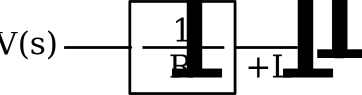

In [6]:
SVG(valid_path + 'model_fig31.svg')

$$T\left(s\right)=KI_{f}\left(s\right)\Longrightarrow\frac{T\left(s\right)}{I_{f}\left(s\right)}=K$$

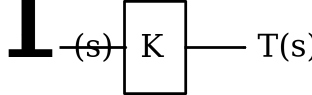

In [7]:
SVG(valid_path + 'model_fig32.svg')

$$T\left(s\right)=\beta s\theta\left(s\right)-\beta\theta\left(0\right)+Js^{2}\theta\left(s\right)-Js\theta\left(0\right)-J\dot{\theta\left(0\right)}\Longrightarrow T\left(s\right)=\theta\left(s\right)\left[\beta s+Js^{2}\right]\Longrightarrow\frac{\theta\left(s\right)}{T\left(s\right)}=\frac{1}{\beta s+Js^{2}}
$$

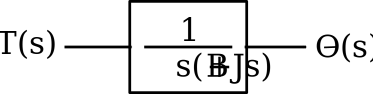

In [8]:
SVG(valid_path + 'model_fig33.svg')

Organizing the blocks:

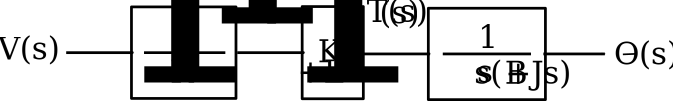

In [9]:
SVG(valid_path + 'model_fig34.svg')

Applying block algebra:

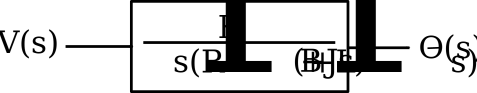

In [10]:
SVG(valid_path + 'model_fig35.svg')

And from this block we can write the engine transfer function as:

$$\frac{\theta\left(s\right)}{V\left(s\right)}=\frac{K}{s\left(R_{f}+L_{f}s\right)\left(\beta+Js\right)}$$